<a href="https://colab.research.google.com/github/charles01george/02_Humans_or_Not/blob/main/02_Humans_or_Not_Humans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Humans or Not Humans

## Import and become one with the data

In [32]:
import os
import tensorflow as tf

In [33]:
data = "drive/MyDrive/02_Humans_or_Not"

In [34]:
os.listdir(data)

['test', 'train']

In [55]:
# View random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory
  target_folder = target_dir+target_class

  # Get random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")
  return img

Image shape: (320, 240, 3)


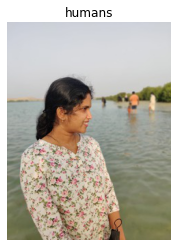

In [73]:
# Visualize data
img = view_random_image(target_dir="drive/MyDrive/02_Humans_or_Not/train/",
                        target_class="humans")

In [61]:
# View the image (array/tensor)
img

array([[[182, 169, 152],
        [182, 169, 152],
        [183, 170, 153],
        ...,
        [129, 130, 135],
        [147, 146, 152],
        [172, 171, 177]],

       [[182, 169, 152],
        [182, 169, 152],
        [183, 170, 153],
        ...,
        [129, 130, 135],
        [151, 152, 157],
        [172, 171, 177]],

       [[182, 169, 152],
        [182, 169, 152],
        [183, 170, 154],
        ...,
        [128, 131, 136],
        [161, 162, 167],
        [170, 171, 176]],

       ...,

       [[164, 155, 146],
        [164, 155, 146],
        [164, 155, 146],
        ...,
        [147, 139, 128],
        [146, 138, 127],
        [146, 138, 127]],

       [[164, 155, 146],
        [164, 155, 146],
        [164, 155, 146],
        ...,
        [146, 138, 127],
        [145, 137, 126],
        [145, 137, 126]],

       [[164, 155, 146],
        [164, 155, 146],
        [164, 155, 146],
        ...,
        [147, 139, 126],
        [148, 140, 127],
        [147, 139, 126]]

In [62]:
# Image shape
img.shape

(320, 180, 3)

Image shape: (320, 240, 3)
Image shape: (240, 320, 3)


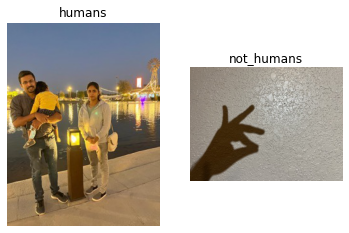

In [86]:
plt.figure()
plt.subplot(1, 2, 1)
humans = view_random_image("drive/MyDrive/02_Humans_or_Not/train/", "humans")
plt.subplot(1, 2, 2)
not_humans = view_random_image("drive/MyDrive/02_Humans_or_Not/train/", "not_humans")

## Preprocess the data(prepare it for a model)

Data is already split into training and test sets.

In [88]:
# Define training and test directory paths
train_dir = "drive/MyDrive/02_Humans_or_Not/train/"
test_dir = "drive/MyDrive/02_Humans_or_Not/test/"

Next step is to turn our data into batches

A batch is a small subset of the dataset a model looks at during training.I am using batch size of 32 and it has proven to be very effctive 

To turn the data into batches, we'll first create an instance of `ImageDataGenerator` for each of our datasets

In [89]:
from PIL import Image
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

 The `rescale` parameter, along with 1/255. is divide all of the pizel values by 255(image pixel values were between 0 and 255). This results in all of the images being imported and their pixel values being normalized (converted to be between 0 and 1)

Now got a coulple of ImageDataGenerator instances, it can load our images from their respective directories using the `flow_from_directory` method.

In [91]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),  # (height, width)
                                               class_mode="binary",     # classification problem type
                                               batch_size=32)           # how many images will be in each batch

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 835 images belonging to 2 classes.
Found 255 images belonging to 2 classes.
